In [187]:
import pandas as pd
import re
import numpy as np
from scipy import stats

%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from dateutil import parser
from datetime import datetime

# Purpose

This notebook is meant to analyze VA data based on master.csv. 

# Reading in Data

In [188]:
master = pd.read_csv("Master/Master.csv")
df = master
master.head()

,Appts_Pending_1412,%_Appts_Over_30_Pending_1412,PC_Wait_Pending_1412,SC_Wait_Pending_1412,MH_Pending_1412,ID,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,...,Pending_Increase,Pending_Increase_%,Complete_Increase,Complete_Increase_%,Missing_Leadership,Choice_Increase_%,PC_Wait_Pending_Increase,PC_Wait_Pending_Increase_%,PC_Wait_Complete_Increase,PC_Wait_Complete_Increase_%
0,42899,2.70%,2.51,4.07,2.77,402to,(V01) (402) HCS TOGUS ME,1293.0,1272.0,1248.0,...,710,0.016551,4225.0,0.172745,1.0,0.017927,5.31,2.115538,2.24,0.823529
1,23709,2.16%,3.92,3.95,0.79,405wh,(V01) (405) MROC WHT RIVER JCT VT,852.0,853.0,881.0,...,-2618,-0.110422,2349.0,0.122140,0.0,0.026059,2.17,0.553571,1.38,0.616071
2,8105,5.17%,1.12,10.53,4.41,518be,(V01) (518) MC BEDFORD MA,1313.0,1265.0,1245.0,...,6351,0.783590,1194.0,0.099699,1.0,0.003997,-0.52,-0.464286,-0.45,-0.511364
3,85625,1.71%,1.66,3.53,3.92,523va,(V01) (523) HCS BOSTON MA,4022.0,4011.0,4041.0,...,-1252,-0.014622,637.0,0.013948,0.0,0.006944,12.80,7.710843,6.31,5.439655
4,19511,2.64%,2.66,4.21,5.13,608ma,(V01) (608) MC MANCHESTER NH,663.0,683.0,691.0,...,5913,0.303060,1233.0,0.069993,0.0,0.027697,3.09,1.161654,2.50,1.004016


In [189]:
df.columns

Index([u'Appts_Pending_1412', u'%_Appts_Over_30_Pending_1412',
       u'PC_Wait_Pending_1412', u'SC_Wait_Pending_1412', u'MH_Pending_1412',
       u'ID', u'ORGANIZATION', u'MAY-FY11', u'MAY-FY12', u'MAY-FY13',
       u'MAY-FY14', u'MAY-FY15', u'MAY-FY16', u'Appts_Pending_1610',
       u'%_Appts_Over_30_Pending_1610', u'PC_Wait_Pending_1610',
       u'SC_Wait_Pending_1610', u'MH_Pending_1610', u'Appts_Complete_1608',
       u'%_Appts_Over_30_Complete_1608', u'PC_Wait_Complete_1608',
       u'SC_Wait_Complete_1608', u'MH_Complete_1608', u'Station', u'Location',
       u'Choice_Hires', u'for_dups', u'Interim', u'Vacancy',
       u'%_Appts_Over_30_Complete_1409', u'Appts_Complete_1409',
       u'MH_Complete_1409', u'PC_Wait_Complete_1409', u'SC_Wait_Complete_1409',
       u'Pending_Increase', u'Pending_Increase_%', u'Complete_Increase',
       u'Complete_Increase_%', u'Missing_Leadership', u'Choice_Increase_%',
       u'PC_Wait_Pending_Increase', u'PC_Wait_Pending_Increase_%',
       u'PC_

In [190]:
df

,Appts_Pending_1412,%_Appts_Over_30_Pending_1412,PC_Wait_Pending_1412,SC_Wait_Pending_1412,MH_Pending_1412,ID,ORGANIZATION,MAY-FY11,MAY-FY12,MAY-FY13,...,Pending_Increase,Pending_Increase_%,Complete_Increase,Complete_Increase_%,Missing_Leadership,Choice_Increase_%,PC_Wait_Pending_Increase,PC_Wait_Pending_Increase_%,PC_Wait_Complete_Increase,PC_Wait_Complete_Increase_%
0,42899,2.70%,2.51,4.07,2.77,402to,(V01) (402) HCS TOGUS ME,1293.0,1272.0,1248.0,...,710,0.016551,4225.0,0.172745,1.0,0.017927,5.31,2.115538,2.24,0.823529
1,23709,2.16%,3.92,3.95,0.79,405wh,(V01) (405) MROC WHT RIVER JCT VT,852.0,853.0,881.0,...,-2618,-0.110422,2349.0,0.122140,0.0,0.026059,2.17,0.553571,1.38,0.616071
2,8105,5.17%,1.12,10.53,4.41,518be,(V01) (518) MC BEDFORD MA,1313.0,1265.0,1245.0,...,6351,0.783590,1194.0,0.099699,1.0,0.003997,-0.52,-0.464286,-0.45,-0.511364
3,85625,1.71%,1.66,3.53,3.92,523va,(V01) (523) HCS BOSTON MA,4022.0,4011.0,4041.0,...,-1252,-0.014622,637.0,0.013948,0.0,0.006944,12.80,7.710843,6.31,5.439655
4,19511,2.64%,2.66,4.21,5.13,608ma,(V01) (608) MC MANCHESTER NH,663.0,683.0,691.0,...,5913,0.303060,1233.0,0.069993,0.0,0.027697,3.09,1.161654,2.50,1.004016
5,22602,9.26%,10.54,12.50,4.18,631va,(V01) (631) MC NORTHAMPTON MA,639.0,726.0,767.0,...,5605,0.247987,-15.0,-0.000768,1.0,0.018868,-2.66,-0.252372,-0.75,-0.118859
6,38893,4.12%,7.40,4.59,9.33,650pr,(V01) (650) MC PROVIDENCE RI,1215.0,1262.0,1279.0,...,16722,0.429949,3451.0,0.120999,1.0,0.029061,-0.40,-0.054054,2.12,0.902128
7,49615,2.18%,2.35,4.15,3.92,689va,(V01) (689) HCS WEST HAVEN CT,2477.0,2541.0,2623.0,...,5592,0.112708,3252.0,0.066883,2.0,0.006401,-0.39,-0.165957,-0.22,-0.164179
8,31376,3.16%,2.33,3.64,4.29,528al,(V02) (479) V2HCNALBANY NY,22.0,48.0,55.0,...,9990,0.318396,-1446.0,-0.058154,2.0,NaN,3.39,1.454936,3.55,2.773438
9,14816,4.20%,3.35,7.70,4.97,528ba,NaN,NaN,NaN,NaN,...,670,0.045221,1879.0,0.138641,0.0,NaN,3.67,1.095522,0.42,0.137705


# Look at Pending Versus Complete

count       141.000000
mean      11503.765957
std       16722.668013
min       -5744.000000
25%        2798.000000
50%        7151.000000
75%       14007.000000
max      110496.000000
Name: Pending_Increase, dtype: float64
R-squared: 0.883852582905


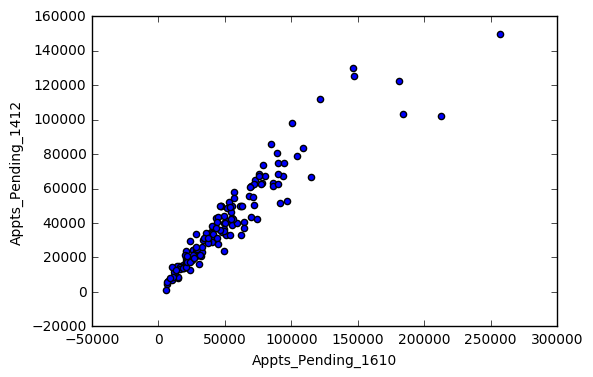

In [191]:
ax = df.plot(kind ='scatter',x='Appts_Pending_1610',y='Appts_Pending_1412')


print df["Pending_Increase"].describe()

slope, intercept, r_value, p_value, std_err = stats.linregress(df["Appts_Pending_1610"],df["Appts_Pending_1412"])
print "R-squared: "+ str(r_value**2)

In [192]:
df[df["Appts_Pending_1610"] >250000]["Station"]

50    573
Name: Station, dtype: object

count      140.000000
mean      2476.564286
std       3042.725816
min      -3430.000000
25%               NaN
50%               NaN
75%               NaN
max      17594.000000
Name: Complete_Increase, dtype: float64
R-squared: nan


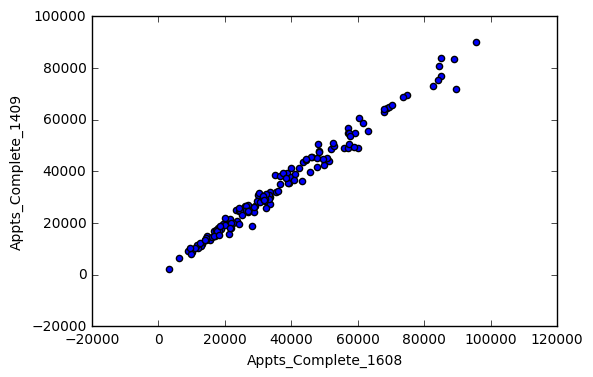

In [193]:
ax = df.plot(kind ='scatter',x='Appts_Complete_1608',y='Appts_Complete_1409')
print df["Complete_Increase"].describe()

slope, intercept, r_value, p_value, std_err = stats.linregress(df["Appts_Complete_1608"],df["Appts_Complete_1409"])
print "R-squared: "+ str(r_value**2)

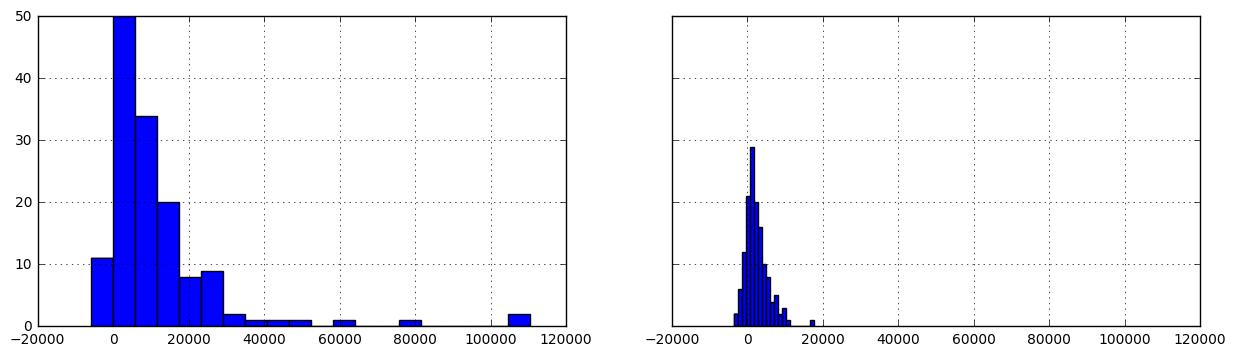

In [194]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15,4))
df["Pending_Increase"].hist(bins=20, ax=ax1)
df["Complete_Increase"].hist(bins=20,ax=ax2)

R-squared 2014: nan
R-squared 2016: 0.770749874578


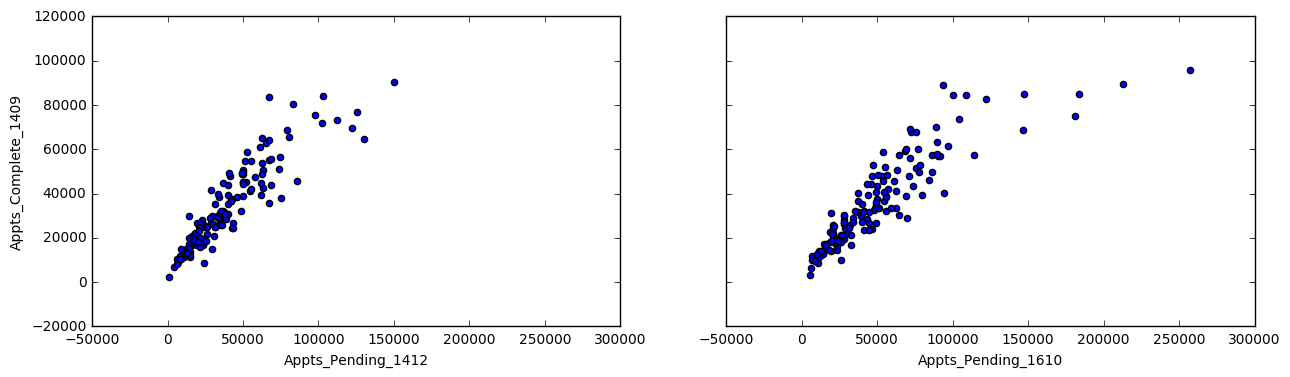

In [195]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharey=True, sharex=True, figsize=(15,4))

df.plot(kind = 'scatter',x='Appts_Pending_1412', y='Appts_Complete_1409',ax=ax1)
df.plot(kind = 'scatter', x='Appts_Pending_1610', y='Appts_Complete_1608',ax=ax2)

slope, intercept, r_value, p_value, std_err = stats.linregress(df["Appts_Pending_1412"],df["Appts_Complete_1409"])
print "R-squared 2014: "+ str(r_value**2)

slope, intercept, r_value, p_value, std_err = stats.linregress(df["Appts_Pending_1610"],df["Appts_Complete_1608"])
print "R-squared 2016: "+ str(r_value**2)



# Leadership

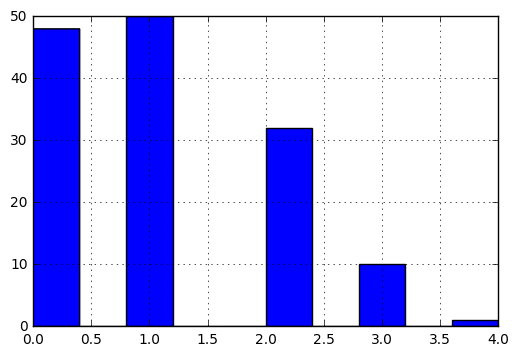

In [196]:
df["Missing_Leadership"].hist()

In [197]:
df["Missing_Leadership"].describe()

count    141.000000
mean       1.049645
std        0.958617
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: Missing_Leadership, dtype: float64

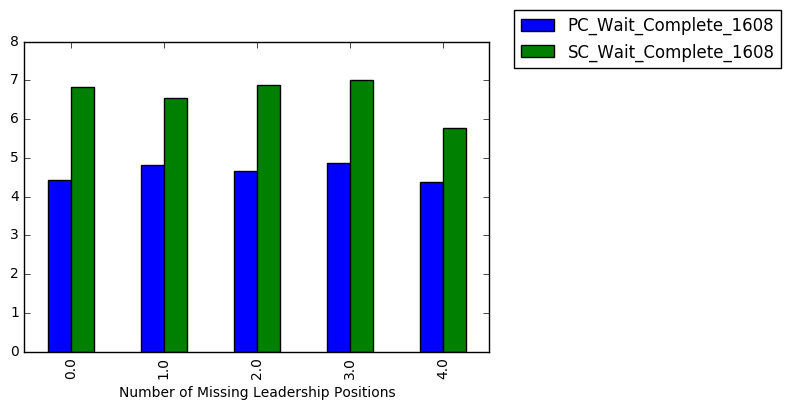

In [198]:
pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =['PC_Wait_Complete_1608','SC_Wait_Complete_1608'],aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

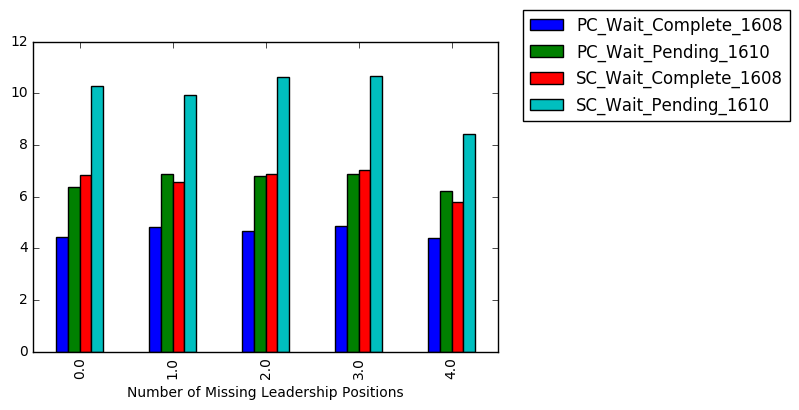

In [199]:
values = ['PC_Wait_Pending_1610','PC_Wait_Complete_1608','SC_Wait_Pending_1610','SC_Wait_Complete_1608']



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

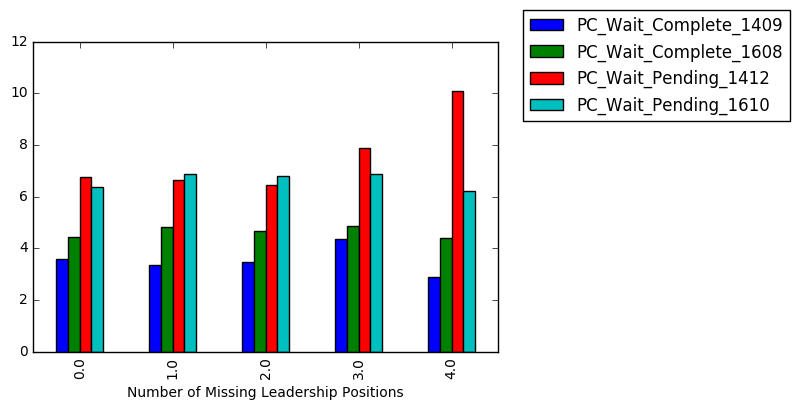

In [200]:
values = ['PC_Wait_Pending_1412','PC_Wait_Complete_1409','PC_Wait_Pending_1610','PC_Wait_Complete_1608']



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

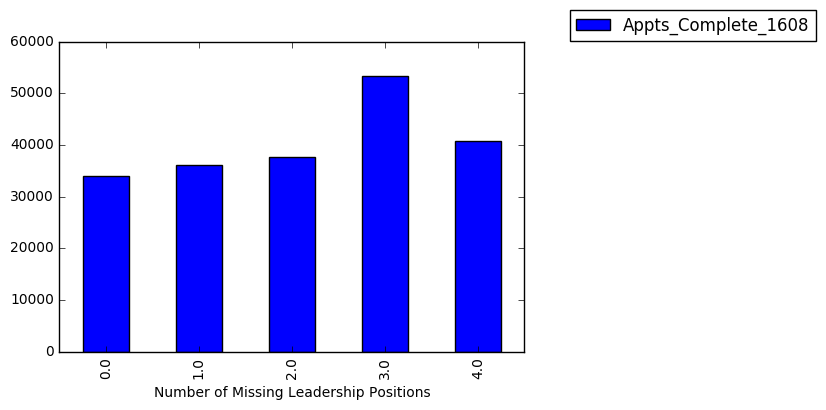

In [201]:
values = ['Appts_Complete_1608']



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()

plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

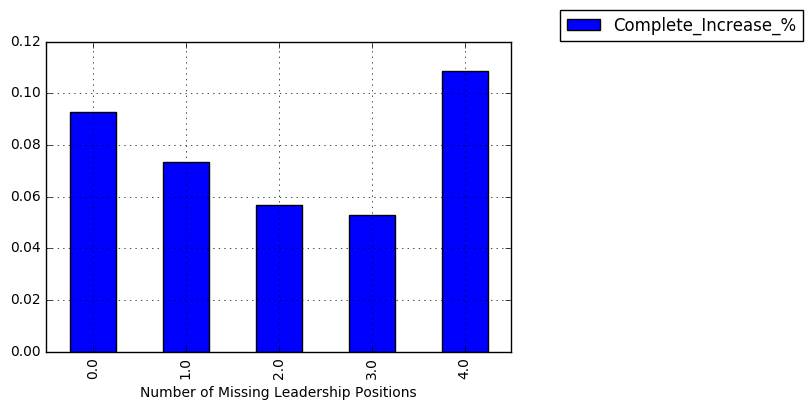

In [202]:
values = ["Complete_Increase_%"]



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()
ax.grid(True)


plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

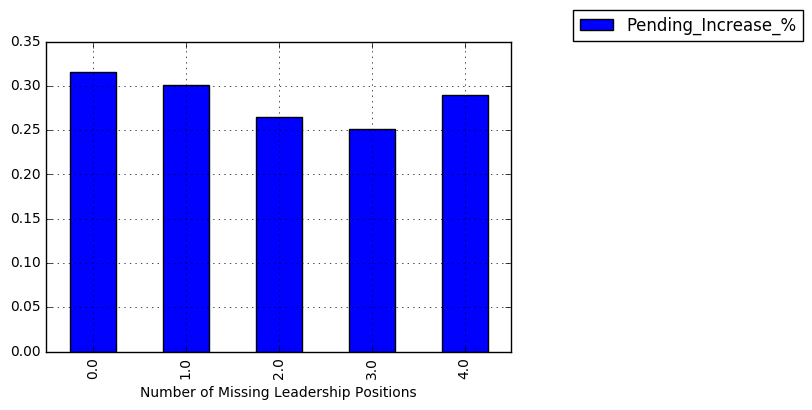

In [203]:
values = ["Pending_Increase_%"]



pivot_Missing_Leadership = pd.pivot_table(df, index=['Missing_Leadership'], values =values,aggfunc=np.mean).reset_index()
ax = pivot_Missing_Leadership.plot(kind='bar',x='Missing_Leadership')
#plt.title("Mean Primary Care Wait Time, Completed Appts 2016")
ax.set_xlabel("Number of Missing Leadership Positions")
#ax.legend_.remove()
ax.grid(True)
plt.legend(bbox_to_anchor=(1.4, 1),
           bbox_transform=plt.gcf().transFigure)

In [204]:
df.columns

Index([u'Appts_Pending_1412', u'%_Appts_Over_30_Pending_1412',
       u'PC_Wait_Pending_1412', u'SC_Wait_Pending_1412', u'MH_Pending_1412',
       u'ID', u'ORGANIZATION', u'MAY-FY11', u'MAY-FY12', u'MAY-FY13',
       u'MAY-FY14', u'MAY-FY15', u'MAY-FY16', u'Appts_Pending_1610',
       u'%_Appts_Over_30_Pending_1610', u'PC_Wait_Pending_1610',
       u'SC_Wait_Pending_1610', u'MH_Pending_1610', u'Appts_Complete_1608',
       u'%_Appts_Over_30_Complete_1608', u'PC_Wait_Complete_1608',
       u'SC_Wait_Complete_1608', u'MH_Complete_1608', u'Station', u'Location',
       u'Choice_Hires', u'for_dups', u'Interim', u'Vacancy',
       u'%_Appts_Over_30_Complete_1409', u'Appts_Complete_1409',
       u'MH_Complete_1409', u'PC_Wait_Complete_1409', u'SC_Wait_Complete_1409',
       u'Pending_Increase', u'Pending_Increase_%', u'Complete_Increase',
       u'Complete_Increase_%', u'Missing_Leadership', u'Choice_Increase_%',
       u'PC_Wait_Pending_Increase', u'PC_Wait_Pending_Increase_%',
       u'PC_

# Wait Times

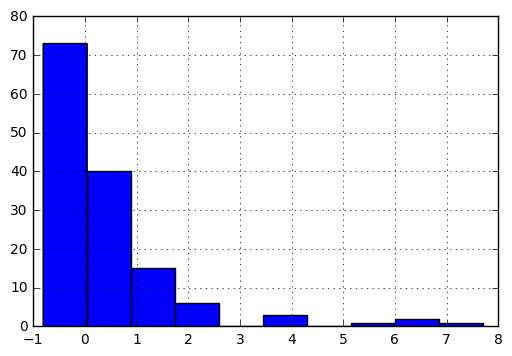

In [205]:
df["PC_Wait_Pending_Increase_%"].hist()

In [206]:
df.columns

Index([u'Appts_Pending_1412', u'%_Appts_Over_30_Pending_1412',
       u'PC_Wait_Pending_1412', u'SC_Wait_Pending_1412', u'MH_Pending_1412',
       u'ID', u'ORGANIZATION', u'MAY-FY11', u'MAY-FY12', u'MAY-FY13',
       u'MAY-FY14', u'MAY-FY15', u'MAY-FY16', u'Appts_Pending_1610',
       u'%_Appts_Over_30_Pending_1610', u'PC_Wait_Pending_1610',
       u'SC_Wait_Pending_1610', u'MH_Pending_1610', u'Appts_Complete_1608',
       u'%_Appts_Over_30_Complete_1608', u'PC_Wait_Complete_1608',
       u'SC_Wait_Complete_1608', u'MH_Complete_1608', u'Station', u'Location',
       u'Choice_Hires', u'for_dups', u'Interim', u'Vacancy',
       u'%_Appts_Over_30_Complete_1409', u'Appts_Complete_1409',
       u'MH_Complete_1409', u'PC_Wait_Complete_1409', u'SC_Wait_Complete_1409',
       u'Pending_Increase', u'Pending_Increase_%', u'Complete_Increase',
       u'Complete_Increase_%', u'Missing_Leadership', u'Choice_Increase_%',
       u'PC_Wait_Pending_Increase', u'PC_Wait_Pending_Increase_%',
       u'PC_

In [207]:
df[df["PC_Wait_Pending_Increase"] > 5][["PC_Wait_Pending_1412","PC_Wait_Pending_1610","PC_Wait_Pending_Increase_%"]]

,PC_Wait_Pending_1412,PC_Wait_Pending_1610,PC_Wait_Pending_Increase_%
0,2.51,7.82,2.115538
3,1.66,14.46,7.710843
11,5.12,10.24,1.000000
78,1.25,9.73,6.784000
83,4.64,15.61,2.364224
85,3.57,11.69,2.274510
90,6.03,12.71,1.107794
109,9.56,15.38,0.608787
110,3.33,16.72,4.021021
114,1.86,13.53,6.274194


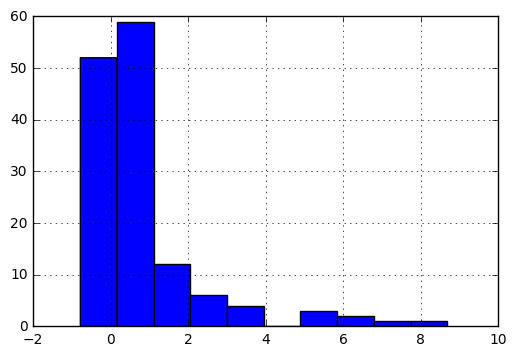

In [209]:
df["PC_Wait_Complete_Increase_%"].hist()